## 色彩增强
1. 了解图像增强的基本原理，掌握图像的灰度增强和彩色增强的Python实现方法；
2. 了解图像平滑和锐化的基本原理，掌握图像的平滑和锐化Python实现方法。

### 实验一 色彩增强

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[56 63 72 ... 74 67 64]
 [63 62 67 ... 71 68 63]
 [58 56 59 ... 58 57 55]
 ...
 [28 15 12 ... 21 20 20]
 [22 23 27 ... 25 26 29]
 [ 2 14 28 ... 25 29 35]]


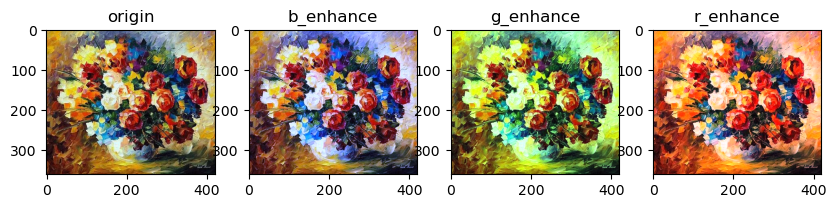

In [18]:
image = cv2.imread("flower.jpg",cv2.IMREAD_COLOR)
b = image[:,:,0]
# print(image[:,:,0])
g = image[:,:,1]
# print(g)
r = image[:,:,2]
# print(r)

def enhance(rat,obj):
    rat=(abs(rat))
    box=np.zeros(obj.shape, np.uint8)
#   对一个列表，既要遍历索引又要遍历元素
    for i,i_list in enumerate(obj):
        for j,ele in enumerate(i_list):
            s=ele*rat
            if s>255:
                s=255
            box[i][j]=int(s)
    return box

print(b)
image = cv2.merge([r,g,b])
b_enhance = enhance(1.5,b)
g_enhance = enhance(1.5,g)
r_enhance = enhance(1.5,r)

image_b = cv2.merge([r,g,b_enhance])
image_g = cv2.merge([r,g_enhance,b])
image_r = cv2.merge([r_enhance,g,b])

fig,axes=plt.subplots(1,4,figsize=(10,8),dpi = 100)
axes[0].imshow(image)
axes[0].set_title("origin")
axes[1].imshow(image_b)
axes[1].set_title("b_enhance")
axes[2].imshow(image_g)
axes[2].set_title("g_enhance")
axes[3].imshow(image_r)
axes[3].set_title("r_enhance")
plt.show()


## 图像平滑
- 中值滤波
中值滤波可以保留目标边缘，这是中值滤波器相对于均值滤波器的最大优势。中值滤波具有去噪的性能，可以消除孤立的噪声点，可以用来减弱随机干扰和脉冲干扰，但是边缘不模糊。

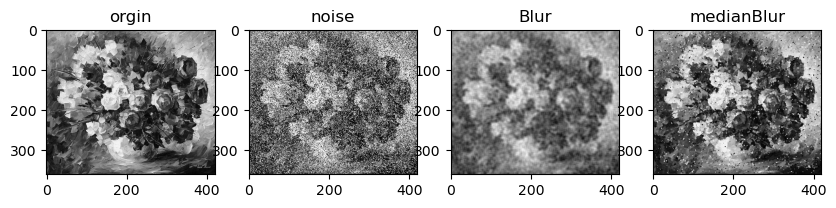

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 自定义噪声函数
def noise(img,snr):
    h = img.shape[0]
    w = img.shape[1]
    img1 = img.copy()
    sp = h * w # 计算像素点个数
    NP = int(sp*(1-snr))
    for i in range(NP):
        randx = np.random.randint(1,h-1)
        randy = np.random.randint(1,w-1)
        if np.random.random()<=0.5:   # np.random.random()生成一个 0 至 1 之间的浮点数
            img1[randx,randy]=0
        else:
            img1[randx,randy]=255
    return img1
        

# 读入灰度图
image = cv2.imread("flower.jpg",0)
noise_image = noise(image,0.5) # 一半都是噪声
# 中值滤波
medianBlur_image = cv2.medianBlur(noise_image,3)
blur_image = cv2.blur(noise_image,(7,7))
fig,axes = plt.subplots(1,4,figsize=(10,8),dpi = 100)
axes[0].imshow(image,'gray')
axes[0].set_title("orgin")
axes[1].imshow(noise_image,'gray')
axes[1].set_title("noise")
axes[2].imshow(blur_image,'gray')
axes[2].set_title("Blur")
axes[3].imshow(medianBlur_image,'gray')
axes[3].set_title("medianBlur")
plt.show()

## 图像锐化
图像锐化处理的目的是消除模糊，突出边缘。锐化滤波器减弱或消除了傅立叶空间的低频分量，保留高频分量，从而加强了图像的轮廓，使图像看起来比较清晰。

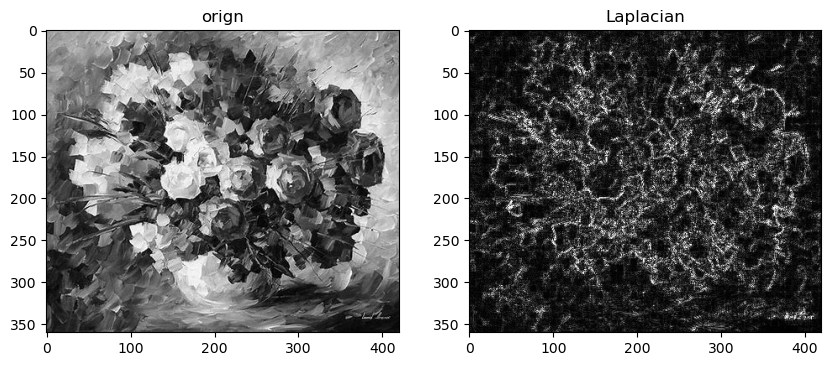

In [34]:
import cv2
img_gray = cv2.imread("flower.jpg",0)
#  16位无符号整数（0…65535）
result = cv2.Laplacian(img_gray,3)
# 将CV_16S型的输出图像转变成CV_8U型的图像。
Scale_abs = cv2.convertScaleAbs(result)
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,8),dpi=100)
axes[0].imshow(img_gray,'gray')
axes[0].set_title("orign")
axes[1].imshow(Scale_abs,'gray')
axes[1].set_title("Laplacian")
plt.show()